Solución Actividad 1

* Daniela Nath - 10192004
* Daniel Sofia Peñuela - 10192007


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

In [2]:
act_1 = pd.read_csv('/content/activity_1_ml.csv')

In [4]:
act_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WAGE        490 non-null    float64
 1   EDUC        552 non-null    int64  
 2   EXPER       552 non-null    int64  
 3   GENDER      549 non-null    object 
 4   FAM_STATUS  469 non-null    object 
 5   TENURE      552 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 26.0+ KB


eliminar errores

In [7]:
act_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WAGE        474 non-null    float64
 1   EDUC        535 non-null    int64  
 2   EXPER       535 non-null    int64  
 3   GENDER      532 non-null    object 
 4   FAM_STATUS  454 non-null    object 
 5   TENURE      535 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 25.2+ KB


In [8]:
act_1.duplicated().sum()

0

verificacion de variables
# fam_status

In [9]:
act_1['FAM_STATUS'].unique()

array(['MARRIED', 'alone', 'single', 'married', nan, 'SINGLE'],
      dtype=object)

In [10]:
dictio_correct_1 ={'MARRIED':'married',
                'SINGLE':'single',
                'alone':'single',
                'married' : 'married',
                'single' : 'single'}

In [11]:
act_1['FAM_STATUS']=act_1['FAM_STATUS'].map(dictio_correct_1)

In [12]:
act_1['FAM_STATUS'].unique()

array(['married', 'single', nan], dtype=object)

# gender

In [13]:
act_1['GENDER'].unique()

array(['male', 'female', 'MALE', 'FEMALE', 'man', 'woman', nan],
      dtype=object)

In [14]:
dictio_correct_2 ={'male':'male',
                'female':'female',
                'MALE':'male',
                'FEMALE' : 'female',
                   'man' : 'male',
                   'woman' : 'female'}

In [15]:
act_1['GENDER']=act_1['GENDER'].map(dictio_correct_2)

In [16]:
act_1['GENDER'].unique()

array(['male', 'female', nan], dtype=object)

In [5]:
act_1.drop_duplicates(inplace=True)
act_1.reset_index(drop=True, inplace=True)

# valores nulos

In [17]:
act_1.isna().sum()

WAGE          61
EDUC           0
EXPER          0
GENDER         3
FAM_STATUS    81
TENURE         0
dtype: int64

In [18]:
act_1.dropna()

,WAGE,EDUC,EXPER,GENDER,FAM_STATUS,TENURE
0,10.00,0,3,male,married,2
1,3.50,0,2,female,single,0
2,3.30,0,5,female,single,0
3,5.00,0,15,male,married,5
4,11.25,0,28,male,married,25
...,...,...,...,...,...,...
529,6.46,0,27,male,married,0
530,2.90,0,1,male,single,2
531,3.25,0,14,female,married,2
532,7.63,0,8,female,single,4


In [19]:
act_1 = act_1.dropna()

In [20]:
act_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 534
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WAGE        403 non-null    float64
 1   EDUC        403 non-null    int64  
 2   EXPER       403 non-null    int64  
 3   GENDER      403 non-null    object 
 4   FAM_STATUS  403 non-null    object 
 5   TENURE      403 non-null    int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 22.0+ KB


In [28]:
act_1 = act_1.drop(columns = 'EDUC')

In [29]:
act_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 534
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WAGE        403 non-null    float64
 1   EXPER       403 non-null    int64  
 2   GENDER      403 non-null    object 
 3   FAM_STATUS  403 non-null    object 
 4   TENURE      403 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 18.9+ KB


# visualización data

DISPERSION

<Axes: xlabel='EXPER', ylabel='WAGE'>

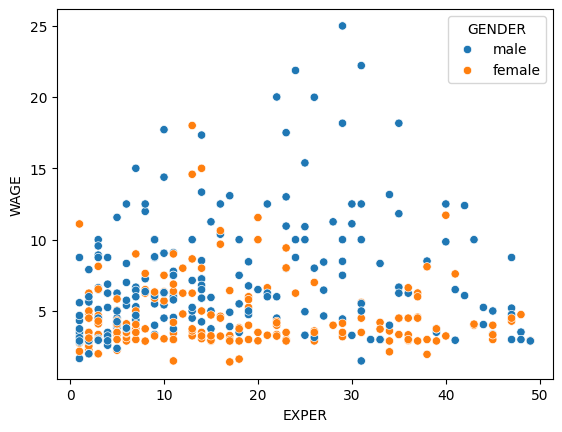

In [24]:
sns.scatterplot(data= act_1, y='WAGE', x='EXPER', hue='GENDER')

<Axes: xlabel='TENURE', ylabel='WAGE'>

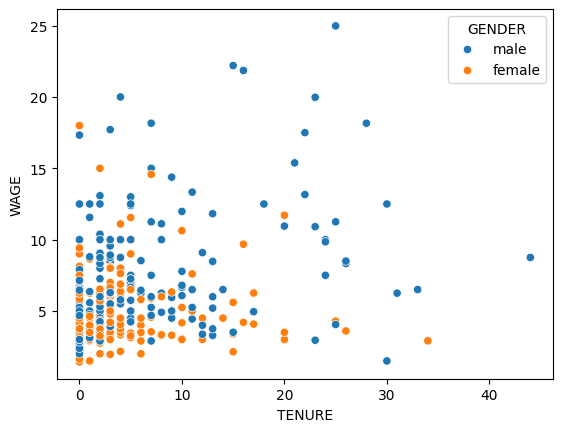

In [25]:
sns.scatterplot(data= act_1, y='WAGE', x='TENURE', hue='GENDER')

BOXPLOT

<Axes: xlabel='FAM_STATUS', ylabel='WAGE'>

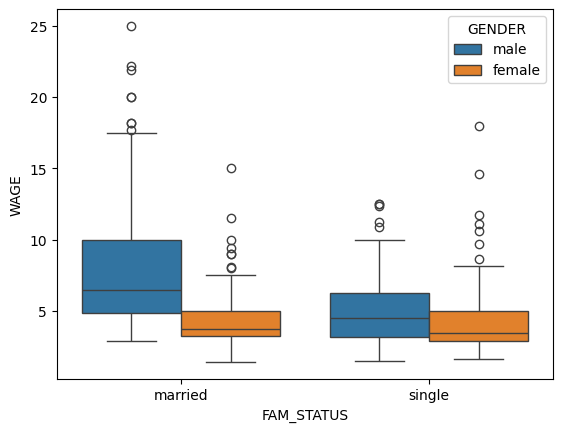

In [ ]:
sns.boxplot(data=act_1, x='FAM_STATUS', y='WAGE', hue='GENDER')

HISTOGRAMA

<Axes: xlabel='WAGE', ylabel='Count'>

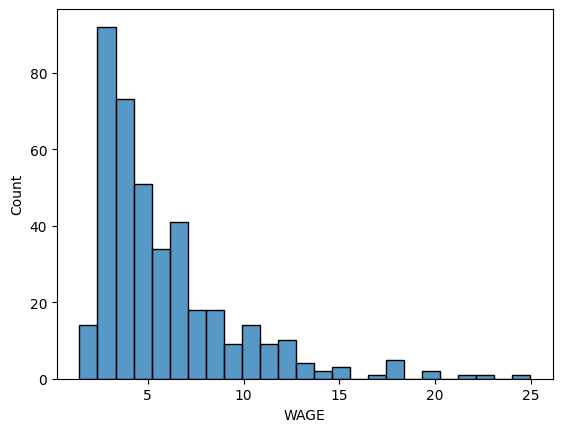

In [35]:
sns.histplot(data = act_1, x= 'WAGE')

<Axes: xlabel='EXPER', ylabel='Count'>

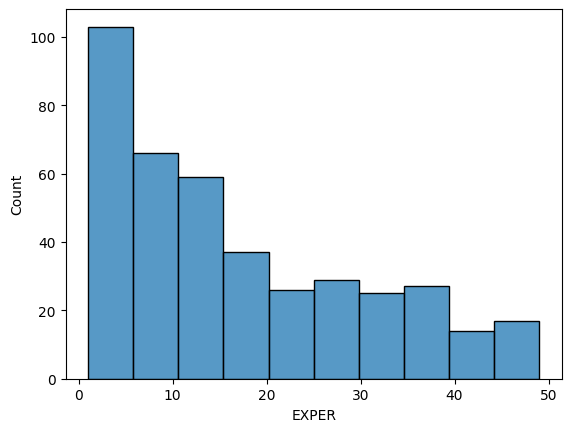

In [36]:
sns.histplot(data = act_1, x= 'EXPER')

<Axes: xlabel='TENURE', ylabel='Count'>

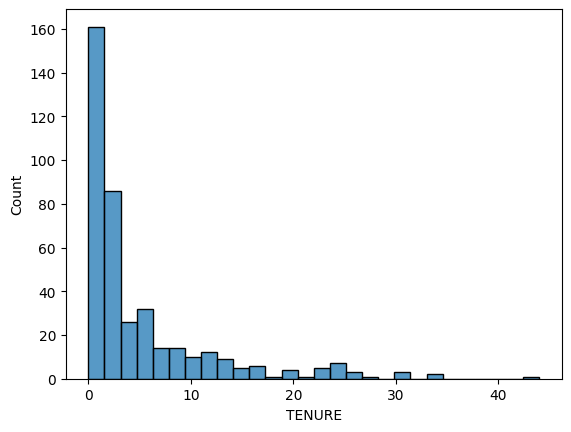

In [37]:
sns.histplot(data = act_1, x= 'TENURE')

BARRAS

In [40]:
fem = act_1['GENDER'].value_counts()
fem.index = ['m', 'f']

In [41]:
fem

m    206
f    197
Name: GENDER, dtype: int64

<BarContainer object of 2 artists>

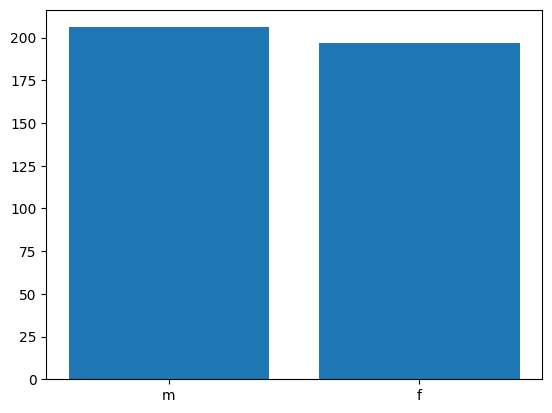

In [42]:
plt.bar(fem.index, fem.values)

In [43]:
fam = act_1['FAM_STATUS'].value_counts()
fam.index = ['M', 'S']

In [44]:
fam

M    245
S    158
Name: FAM_STATUS, dtype: int64

<BarContainer object of 2 artists>

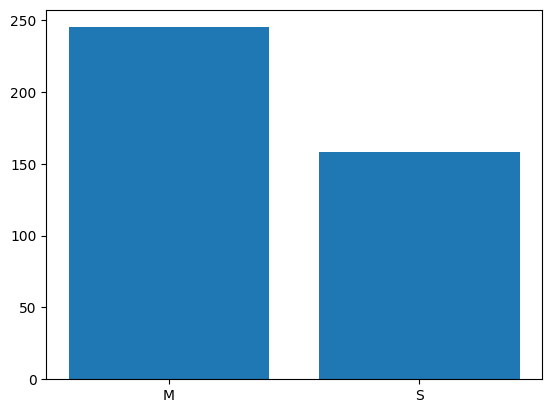

In [45]:
plt.bar(fam.index, fam.values)